In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import pickle
from sklearn.externals import joblib

In [2]:
df=pd.read_csv("hewe.csv")

In [3]:
df.head()

,height,weight
0,150,45
1,170,52
2,180,95
3,190,120
4,130,32


In [4]:
df.describe()

,height,weight
count,6.00000,6.000000
mean,157.50000,62.333333
std,26.78619,36.784055
min,125.00000,30.000000
25%,135.00000,35.250000
50%,160.00000,48.500000
75%,177.50000,84.250000
max,190.00000,120.000000


In [23]:
#saving the model
joblib.dump(regr,"mymodel.pkl")

['mymodel.pkl']

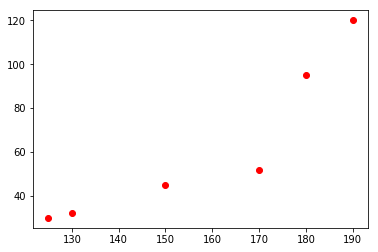

In [5]:
plt.scatter(df.height,df.weight,color='r')

In [10]:
value=np.random.rand(len(df))<.8

In [11]:
train=df[value]
test=df[~value]

In [12]:
print(train)

   height  weight
0     150      45
1     170      52
2     180      95
3     190     120
5     125      30


In [13]:
print(test)

   height  weight
4     130      32


In [14]:
regr=lm.LinearRegression()
train_x=np.asanyarray(train[['height']])
train_y=np.asanyarray(train[['weight']])
regr.fit(train_x,train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(regr.coef_)

[[1.30373134]]


In [16]:
print(regr.intercept_)

[-144.10820896]


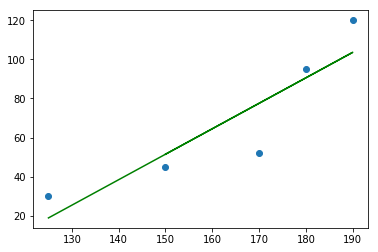

In [17]:
plt.scatter(train.height,train.weight)
plt.plot(train_x,regr.intercept_+regr.coef_*train_x,'-g')
plt.show()

In [18]:
test_x=np.asarray(test[['height']])
test_y=np.asarray(test[['weight']])
prediction=regr.predict(test_x)
print(prediction)

[[25.37686567]]


In [19]:
predict_df=pd.read_csv("check.csv")
predict_df.head()

,height,weight
0,140,0


In [20]:
predict_x=np.asanyarray(predict_df[['height']])
prediction=regr.predict(predict_x)
print(prediction)

[[38.4141791]]
